# 简介

+ 解决二分类的问题
+ 类别分别用0和1表示

# 问题提出

1. 假设函数  
$$\hat{y}=h_{\theta}(x)=g\left(\theta^{T} x\right)=\frac{1}{1+e^{-\theta^{T} x}}$$
$$g(z)=\frac{1}{1+e^{-z}} \text { 其中 }: z = \theta^Tx  \text{（sigmoid函数）}$$
2. 损失函数
$$L(\hat{y}, y)=-y \log \hat{y}-(1-y) \log (1-\hat{y})$$
3. 代价函数
$$\begin{array}{l}
J(\theta)=\frac{1}{m} \sum_{i=1}^{m} L\left(\hat{y}^{(i)}, y^{(i)}\right) \\
=\frac{1}{m} \sum_{t=1}^{m}\left[-y^{(i)} \log \hat{y}^{(i)}-\left(1-y^{(i)}\right) \log \left(1-\hat{y}^{(i)}\right)\right] \\
=\frac{1}{m} \sum_{i=1}^{m}\left[-y^{(i)} \log \frac{1}{1+e^{-\theta^{T} x^{(i)}}}-\left(1-y^{(i)}\right) \log \left(1-\frac{1}{\left.1+e^{-\theta^{T} x^{(i)}}\right)}\right)\right]
\end{array}$$


# 逻辑回归求解
$$\begin{aligned}
&\frac{\partial}{\partial \theta_{j}} J(\theta)=\frac{\partial}{\partial \theta_{j}} \frac{1}{m} \sum_{i=1}^{m}\left[-y^{(i)} \log \frac{1}{1+e^{-\theta^{T} x^{(i)}}}-\left(1-y^{(i)}\right) \log \left(1-\frac{1}{\left.1+e^{-\theta^{T} x^{(i)}}\right)}\right]\right.\\
&=\frac{\partial}{\partial \theta_{j}} \frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(1+e^{-\theta^{T} x^{(i)}}\right)+\left(1-y^{(i)}\right) \log \left(1+e^{\theta^{T} x^{(i)}}\right)\right]\\
&=\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \frac{-x_j^{(i)} e^{-\theta^{T} x^{(i)}}}{1+e^{-\theta^{T} x^{(i)}}}+\left(1-y^{(i)}\right) \frac{x_{j}^{(i)} e^{\theta^{T} x^{(i)}}}{1+e^{\theta^{T} x^{(i)}}}\right]\\
&=\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \frac{-x_{j}^{(i)}}{1+e^{\theta^{T} x^{(i)}}}+\left(1-y^{(i)}\right) \frac{x_{j}^{(i)} e^{\theta^{T} x^{(i)}}}{1+e^{\left.\theta^{T} x^{(i}\right)}}\right]\\
&=\frac{1}{m} \sum_{i=1}^{m}\left[\frac{-x_{j}^{(i)} y^{(i)}+x_{j}^{(i)} e^{\theta^{T} x^{(i)}}-y^{(i)} x_{j}^{(i)} e^{\theta^{T} x^{(i)}}}{1+e^{\theta^{T} x^{(i)}}}\right]\\
&=\frac{1}{m} \sum_{i=1}^{m}\left[\frac{-y^{(i)}\left(1+e^{\theta^{T} x^{(i)}}\right)+e^{\theta^{T} x^{(i)}}}{1+e^{\theta^{T} x^{(i)}}} x_{j}^{(i)}\right]=\frac{1}{m} \sum_{i=1}^{m}\left[\left(-y^{(i)}+\frac{e^{\theta^{T} x^{(i)}}}{1+e^{\theta^{j} x^{(i)}}}\right) x_{j}^{(i)}\right]\\
&=\frac{1}{m} \sum_{(i=1}^{m}\left[\left(-y^{(i)}+\frac{1}{1+e^{-\theta^{T} x^{(i)}}}\right) x_{j}^{(i)}\right]=\frac{1}{m} \sum_{i=1}^{m}\left[\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}\right]
\end{aligned}$$

+ 迭代公式  
$\theta_{j}:=\theta_{j}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left[\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}\right]$  
其中：
$h_{\theta}(x)=\frac{1}{1+e^{-\theta^{T} x}}$

## 代码实现

In [1]:
from sklearn.metrics import accuracy_score

In [2]:
def loaddata():
    data = np.loadtxt('data/3_1.txt',delimiter=',')
    n = data.shape[1] - 1  # 特征数
    X = data[:, 0:n]
    y = data[:, -1].reshape(-1, 1)
    return X, y
def plot(X,y):
    pos = np.where(y==1)
    neg = np.where(y==0)
    plt.scatter(X[pos[0],0],X[pos[0],1],marker='x')
    plt.scatter(X[neg[0], 0], X[neg[0], 1], marker='o')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.show()

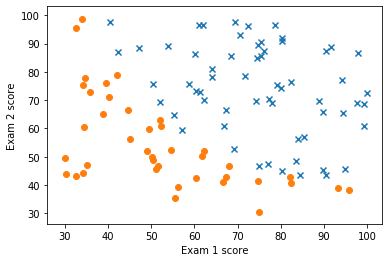

In [3]:
X,y = loaddata()
plot(X,y)

In [4]:
def sigmoide(z):
    r = 1 / (1 + np.exp(-z))
    return r
def hypothesis(X, theta):
    z = np.dot(X, theta)
    return sigmoide(z)
def computeCost(X, y, theta):
    m = X.shape[0]
    z = -1 * y * np.log(hypothesis(X,theta))-(1-y) * np.log(1-hypothesis(X,theta))
    return np.sum(z)/m

In [5]:
def gradientDescent(X,y,theta,iterations,alpha):
    #取数据条数
    m = X.shape[0]
    #在x最前面插入全1的列
    X = np.hstack((np.ones((m, 1)), X))
    for i in range(iterations):
        for j in range(len(theta)):
            theta[j] = theta[j]-(alpha/m)*np.sum((hypothesis(X,theta) - y)*X[:,j].reshape(-1,1))
        #每迭代1000次输出一次损失值
        if(i%50000==0):
            print('第',i,'次迭代，当前损失为：',computeCost(X,y,theta),'theta=',theta)
    return theta

def predict(X):
    # 在x最前面插入全1的列
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X, 0, values=c, axis=1)  
    #求解假设函数的值
    h = hypothesis(X,theta)
    #根据概率值决定最终的分类,>=0.5为1类，<0.5为0类
    h[h>=0.5]=1
    h[h<0.5]=0
    return h

In [6]:
n = X.shape[1]#特征数
theta = np.zeros(n+1).reshape(n+1, 1)  # theta是列向量,+1是因为求梯度时X前会增加一个全1列
iterations = 250000
alpha = 0.008
theta = gradientDescent(X,y,theta,iterations,alpha)
print('theta=\n',theta)

第 0 次迭代，当前损失为： 3.4898192542187316 theta= [[ 0.0008    ]
 [ 0.0959687 ]
 [-0.17080118]]
第 50000 次迭代，当前损失为： 0.9221874390429973 theta= [[-1.96095214e+01]
 [ 2.78099355e-01]
 [ 7.52595875e-03]]
第 100000 次迭代，当前损失为： 0.33992108594315495 theta= [[-24.06932143]
 [  0.1833052 ]
 [  0.23863557]]
第 150000 次迭代，当前损失为： 0.2415806458263704 theta= [[-25.40956873]
 [  0.18523859]
 [  0.23836269]]
第 200000 次迭代，当前损失为： 0.2123612218845144 theta= [[-25.68300682]
 [  0.19663504]
 [  0.21377662]]
theta=
 [[-25.7214775 ]
 [  0.21158791]
 [  0.19917776]]


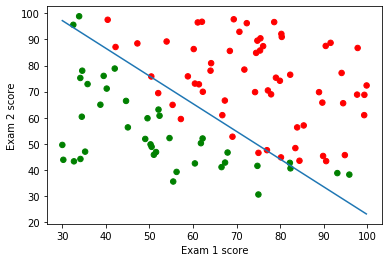

In [7]:
from matplotlib import colors
def plotDescisionBoundary(X,y,theta):
    cm_dark = colors.ListedColormap(['g', 'r'])
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.scatter(X[:,0],X[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

    #化分类决策面 theta0+theta1*x1+theta2*x2 = 0
    # x1 = np.arange(20,110,0.1)
    x1 = np.arange(min(X[:, 0]), max(X[:, 0]), 0.1)
    x2 = -(theta[1]*x1+theta[0])/theta[2]
    plt.plot(x1,x2)
    plt.show()
plotDescisionBoundary(X,y,theta)

[分类指标](https://www.cnblogs.com/guoyaohua/p/classification-metrics.html)

In [8]:
p = predict(X)
print('准确度：',np.mean(p==y))
print('准确度：',accuracy_score(y,p))

准确度： 0.9
准确度： 0.9


# 逻辑回归正则化
+ 代价函数  
$$J(\theta)=\frac{1}{m} \sum_{i=1}^{m}\left[-y^{(i)} \log \frac{1}{1+e^{-\theta^{T} x^{(i)}}}-\left(1-y^{(i)}\right) \log \left(1-\frac{1}{1+e^{-\theta^{T} x^{(i)}}}\right)\right]+\frac{\lambda}{2 m}\|\theta\|_{2}^{2}$$
+ 迭代公式
$$\theta_{j}:=\theta_{j}-\frac{\alpha}{m}\left(\sum_{i=1}^{m}\left[\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}\right]+\lambda \theta_{j}\right)$$

## 代码实现

In [9]:
def sigmoide(z):
    r = 1 / (1 + np.exp(-z))
    return r
def hypothesis(X, theta):
    z = np.dot(X, theta)
    return sigmoide(z)
def computeCost(X, y, theta, lamda):
    m = X.shape[0]
    z = -1 * y * np.log(hypothesis(X,theta))-(1-y) * np.log(1-hypothesis(X,theta))
    return np.sum(z)/m + (lamda/(2*m)*np.sum(np.power(theta, 2)))

In [10]:
def gradientDescent(X,y,theta,iterations,alpha,lamda):
    #取数据条数
    m = X.shape[0]
    #在x最前面插入全1的列
    X = np.hstack((np.ones((m, 1)), X))
    for i in range(iterations):
        for j in range(len(theta)):
            theta[j] = theta[j]-(alpha/m)*(np.sum((hypothesis(X,theta) - y)*X[:,j].reshape(-1,1)) + lamda * theta[j])
        #每迭代1000次输出一次损失值
        if(i%50000==0):
            print('第',i,'次迭代，当前损失为：',computeCost(X,y,theta, lamda),'theta=',theta)
    return theta

def predict(X):
    # 在x最前面插入全1的列
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X, 0, values=c, axis=1)  
    #求解假设函数的值
    h = hypothesis(X,theta)
    #根据概率值决定最终的分类,>=0.5为1类，<0.5为0类
    h[h>=0.5]=1
    h[h<0.5]=0
    return h

In [11]:
n = X.shape[1]#特征数
theta = np.zeros(n+1).reshape(n+1, 1)  # theta是列向量,+1是因为求梯度时X前会增加一个全1列
iterations = 250000
alpha = 0.008
lamda = 0.01
theta = gradientDescent(X,y,theta,iterations,alpha, lamda)
print('theta=\n',theta)

第 0 次迭代，当前损失为： 3.4898211734024334 theta= [[ 0.0008    ]
 [ 0.0959687 ]
 [-0.17080118]]
第 50000 次迭代，当前损失为： 0.7870734058134988 theta= [[-19.33019256]
 [  0.1848856 ]
 [  0.1962559 ]]
第 100000 次迭代，当前损失为： 0.4656598627829162 theta= [[-23.45384231]
 [  0.11660825]
 [  0.27483063]]
第 150000 次迭代，当前损失为： 0.3660485164508709 theta= [[-24.70994973]
 [  0.23088081]
 [  0.14543833]]
第 200000 次迭代，当前损失为： 0.3273561243941825 theta= [[-25.04162387]
 [  0.25808419]
 [  0.16673773]]
theta=
 [[-25.11944059]
 [  0.21193097]
 [  0.17255222]]


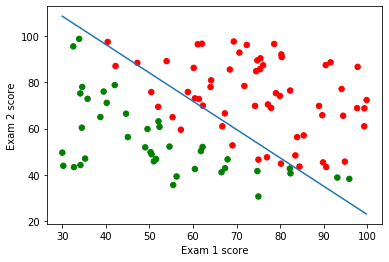

In [12]:
from matplotlib import colors
def plotDescisionBoundary(X,y,theta):
    cm_dark = colors.ListedColormap(['g', 'r'])
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.scatter(X[:,0],X[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

    #化分类决策面 theta0+theta1*x1+theta2*x2 = 0
    # x1 = np.arange(20,110,0.1)
    x1 = np.arange(min(X[:, 0]), max(X[:, 0]), 0.1)
    x2 = -(theta[1]*x1+theta[0])/theta[2]
    plt.plot(x1,x2)
    plt.show()
plotDescisionBoundary(X,y,theta)

In [13]:
p = predict(X)
print('准确度：',np.mean(p==y))
print('准确度：',accuracy_score(y,p))

准确度： 0.88
准确度： 0.88


# 逻辑回归多分类

## One over Rest(OvR)
$\max _{k} h_{\theta}^k(x)$  
K个类别将有K个分类器   
缺点：训练集有偏，对结果会造成影响

## One over One (OvO)  
比较赢数最高的就是分类结果  
K个类别将有k(k-1)/2个分类器  
缺点：训练开销大  
优点：相对OvR准确类高

## Multi over Mutti（MvM）
编码：对N个类别做M次划分，每次划分将一部分类别划为正类，其余父类（M个分类器）   
解码：M个分类器预测标记组成一个编码，将此预测编码与各自类别的编码进行比较，返回其中距离最小的类  
OvO是MvM的一个特例

# 使用sklearn

In [3]:
def loaddata():
    data = np.loadtxt('data/3_1.txt',delimiter=',')
    n = data.shape[1] - 1  # 特征数
    X = data[:, 0:n]
    y = data[:, -1].reshape(-1, 1)
    return X, y
X,y = loaddata()

## 使用逻辑回归模型
常用参数含义：
  - C 正则化参数$\lambda$的倒数,C越大，惩罚越小，易过拟合，泛化能力差。C越小，惩罚越大，不易过拟合，泛化能力好。
  - multi_class: ovr, multinomial
  

In [4]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import accuracy_score

In [5]:
model = linear_model.LogisticRegression(C=50,max_iter=2000)
model.fit(X,y)

e:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
print(model.coef_)
print(model.intercept_)
y_hat = model.predict(X)
print("准确度=",accuracy_score(y,y_hat))

[[0.20621451 0.20145397]]
[-25.15918048]
准确度= 0.89


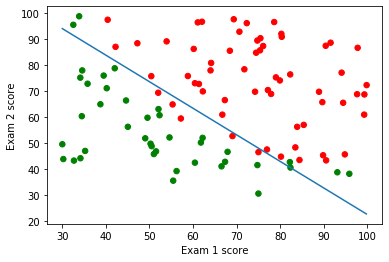

In [7]:
def plotDescisionBoundary(X,y,theta):
    cm_dark = mpl.colors.ListedColormap(['g', 'r'])
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.scatter(X[:,0],X[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

    #化分类决策面 theta0+theta1*x1+theta2*x2 = 0
    # x1 = np.arange(20,110,0.1)
    x1 = np.arange(min(X[:, 0]), max(X[:, 0]), 0.1)
    x2 = -(theta[1]*x1+theta[0])/theta[2]
    plt.plot(x1,x2)
    plt.show()
theta = np.append(model.intercept_,model.coef_)
plotDescisionBoundary(X,y,theta)

# 鸢尾花分类

In [8]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [13]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [17]:
X, y = iris.data, iris.target
X[:5]
y[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

array([0, 0, 0, 0, 0])

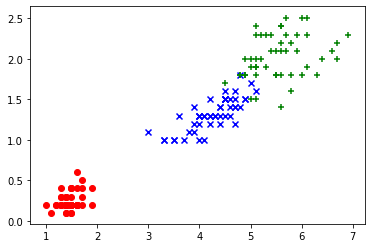

In [18]:
feature = 2
feature_other = 3

plt.scatter(X[0:50,feature], X[0:50,feature_other], color='red', marker='o', label='setosa') #前50个样本
plt.scatter(X[50:100,feature], X[50:100,feature_other], color='blue', marker='x', label='versicolor') #中间50个
plt.scatter(X[100:,feature], X[100:,feature_other],color='green', marker='+', label='Virginica') #后50个样本

In [20]:
model = linear_model.LogisticRegression(C=100)
model.fit(X, y)

e:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
print(model.coef_)
print(model.intercept_)
y_hat = model.predict(X)

print("准确度=",accuracy_score(y,y_hat))

[[-0.367145    3.3699799  -6.1440138  -3.9265341 ]
 [ 1.29751634  0.46886566 -0.55958886 -4.20752165]
 [-0.93037134 -3.83884556  6.70360266  8.13405576]]
[ 19.47461719   5.3394384  -24.81405558]
准确度= 0.9866666666666667


In [22]:
feature = 2
feature_other = 3

X = iris.data
X_2 = X[:,[feature,feature_other]]
y = iris.target

In [23]:
model_2 = linear_model.LogisticRegression(C=100.0)
model_2.fit(X_2,y)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#meshgrid函数生成两个网格矩阵
h = .02
x_min, x_max = X[:, feature].min() - .5, X[:, feature].max() + .5
y_min, y_max = X[:, feature_other].min() - .5, X[:, feature_other].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = model_2.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

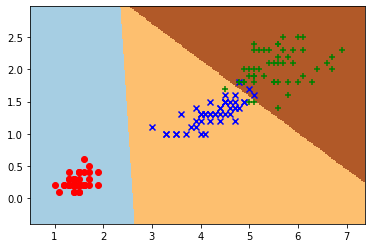

In [29]:
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)

plt.scatter(X[0:50,feature], X[0:50,feature_other], color='red', marker='o', label='setosa') #前50个样本
plt.scatter(X[50:100,feature], X[50:100,feature_other], color='blue', marker='x', label='versicolor') #中间50个
plt.scatter(X[100:,feature], X[100:,feature_other],color='green', marker='+', label='Virginica') #后50个样本
